## 第七题

初始化数据

In [53]:
import pandas as pd
import numpy as np

a = np.array([ [0,3,0],
               [2,0,0],
               [0,1,3],
               [0,1,2],
               [-1,0,1],
               [1,1,1]
            ])
b = ['Red','Red','Red','Green','Green','Red']

df=pd.DataFrame(a, columns=['X1','X2','X3'], index=range(1,7))
df['Y'] = b 
df

,X1,X2,X3,Y
1,0,3,0,Red
2,2,0,0,Red
3,0,1,3,Red
4,0,1,2,Green
5,-1,0,1,Green
6,1,1,1,Red


( a) 计算每个观测值和测试点之间的欧几里得距离。

In [54]:
xt = np.array([0,0,0])
df['dist'] = np.sqrt( np.sum( ( df[['X1','X2','X3']]- xt) ** 2, axis=1) )
df

,X1,X2,X3,Y,dist
1,0,3,0,Red,3.000000
2,2,0,0,Red,2.000000
3,0,1,3,Red,3.162278
4,0,1,2,Green,2.236068
5,-1,0,1,Green,1.414214
6,1,1,1,Red,1.732051


(b) 当 K= 1 时的预测结果是什么?为什么?    

K =1 时，预测结果为Green, 最近的点是5号


In [55]:
print df['dist'].argmin(),  df.loc[df['dist'].argmin(), 'Y']

5 Green


(c) 当 K=3 时预测的结果是什么?为什么?   
取距离最近的三个点，可以看到是两个Red,一个Green，所以最终结果为Green

In [56]:
k=3
idx_k = np.argsort(df['dist'])[:k]
df['Y'][idx_k]

dist
4    Green
5    Green
1      Red
Name: Y, dtype: object

(d) 假如在这个问题中贝叶斯决策边界是非线性的，那么我们期望最优的 K 值是大还是小呢?

## 第三题

由于无法通过程序来画出方差，偏差以及噪音，所以只画出了训练误差和测试误差

In [61]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

# 获取不同复杂度下训练误差和测试误差
def get_error(X_train, X_test, y_train, y_test, degree ):
    reg = linear_model.LinearRegression()
    feat = X_train.columns[:degree]
    reg.fit(X_train[feat], y_train)
    y_pred_train = reg.predict(X_train[feat])
    y_pred_test = reg.predict(X_test[feat])
    err_train = metrics.mean_squared_error(y_train, y_pred_train)
    err_test = metrics.mean_squared_error(y_test, y_pred_test)
    
    return err_train, err_test

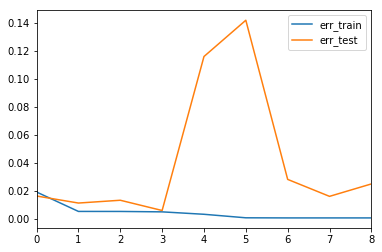

In [62]:
#  数据生成 
X_size = 20
X = np.linspace(0,1,X_size)
Y = X*X + np.random.normal(0, 0.1, X_size) 

# 生成多项式
X_all = pd.DataFrame(X, columns=['X1'])
for i in range(2,10):
    X_all['X'+str(i)] = pow(X,i)
    
# 拆分测试集 
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.33, random_state=42)
err_list = [ get_error(X_train, X_test, y_train, y_test, i) for i in range(1,10) ]
df = pd.DataFrame(err_list, columns=['err_train','err_test'])

# 画图
df.plot()
plt.show()

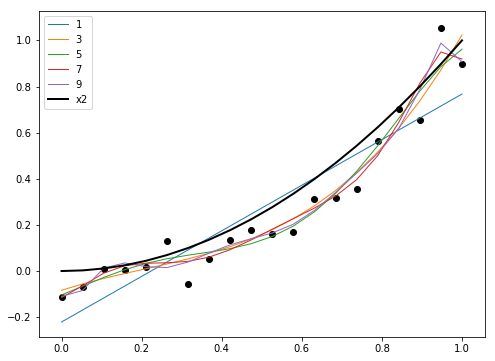

In [63]:
# 获取不同复杂度下的预测值
def get_y_pred(X_train, y_train, degree ):
    reg = linear_model.LinearRegression()
    feat = X_train.columns[:degree]
    reg.fit(X_train[feat], y_train)
    y_pred_train = reg.predict(X_train[feat])
    return y_pred_train

# 画出所有的数据点和回归线
plt.figure(figsize=(8,6))
y_exp = X**2
plt.scatter(X, Y, color='black')
for d in range(1,10,2):
    y_pred = get_y_pred(X_all, Y, d)
    plt.plot(X, y_pred, linewidth=1.0, label=str(d))
plt.plot(X, y_exp, label='x2', color='black', linewidth=2.0)
plt.legend(loc='upper left')
plt.show()